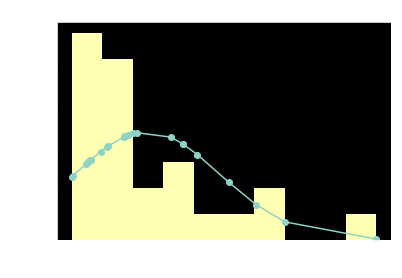

In [1]:
#%matplotlib inline
# module importeren om request te doen
import urllib.request

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm

#import pylab as pl

import json

# VUL HIER DE GEWENSTE KIESKRING EN PARTIJ IN, PARTIJ HEEFT EEN NUMMER
KieskringNaam = "Merchtem"
Partijnummer = 3
# IS BIJNA ALTIJD DEZE PARTIJEN (WE GEBRUIKEN NUMMERS OMDAT DE NAMEN KUNNEN VERANDEREN ADHV COALITIES)
# 1 = SPA
# 2 = NVA
# 3 = CD&V
# 4 = GROEN
# 5 = VLAAMS BELANG
# 6 = OPEN VLD
# 7 = LIJST A
# 8 = PVDA



# variabele om requested data in te plaatsen
kieskringdata = urllib.request.urlopen("http://www.rocre.be/verkiezingen/json.php?fields=kieskring,naamstemmen,naam,id,lijstnr&duplicates=false").read()

# De data die we terugkeren gaan laden in JSON formaat
data = json.loads(kieskringdata)

# Een nieuwe lokale lijst maken van de stemmen
kieskring_stemmen = list()

# Omdat de json data in een wrapper van results zit dit gaan vervangen zodat de code op volgende lijnen korter is.
data = data["results"]

# Gaan kijken voor de gekozen kieskring en partij of er data inzit en deze dan bijhouden in de lokale lijst
for x in data:
    if(x["kieskring"] == KieskringNaam and int(x["lijstnr"]) == Partijnummer):
        kieskring_stemmen.append(int(x["naamstemmen"]))
# als er geen stemmen zijn moet het programma stoppen 
if(len(kieskring_stemmen) == 0) :
        print("ERROR")
        exit()
# de stemmen van klein naar groot gaan sorteren
kieskring_stemmen = sorted(kieskring_stemmen)

# de Y as gaan bepalen adhv de normaalverdeling
y = norm.pdf(kieskring_stemmen, np.mean(kieskring_stemmen), np.std(kieskring_stemmen))
plt.plot(kieskring_stemmen,y,'-o')

plt.xlabel("Aantal stemmen per kandidaat")
plt.ylabel("Kansdichtheid")
plt.title("Stelling 1 in : " + KieskringNaam + " voor partijnr : "  + str(Partijnummer))

# Een histogram tekenen om makkelijk te gaan kijken of het een normaalverdeling is
plt.hist(kieskring_stemmen,density=True)
plt.show()

# We kunnnen duidelijk zien dat het geen normaalverdeling is

